In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/bioresponse.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [ ]:
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = data.drop('Activity', axis=1)
target = data['Activity']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size=0.25, random_state=12345)

In [ ]:
def decision_tree(start, stop):
    best_accuracy = 0
    best_depth_accuracy = 0
    best_f1_score = 0
    best_depth_f1_score = 0
    best_precision = 0
    best_depth_precision = 0
    best_recall = 0
    best_depth_recall = 0
    best_log_loss = 100
    best_depth_log_loss = 0
    for depth in range(start, stop):
        decision_tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
        decision_tree_model.fit(features_train, target_train)
        predictions = decision_tree_model.predict(features_test)
        accuracy = metrics.accuracy_score(target_test, predictions)
        log_loss = metrics.log_loss(target_test, predictions)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth_accuracy = depth
        f1_score = metrics.f1_score(target_test, predictions)
        if f1_score > best_f1_score:
            best_f1_score = f1_score
            best_depth_f1_score = depth
        precision = metrics.precision_score(target_test, predictions)
        if precision > best_precision:
            best_precision = precision
            best_depth_precision = depth
        recall = metrics.recall_score(target_test, predictions)
        if recall > best_recall:
            best_recall = recall
            best_depth_recall = depth
        log_loss = metrics.log_loss(target_test, decision_tree_model.predict_proba(features_test))
        if log_loss < best_log_loss:
            best_log_loss = log_loss
            best_depth_log_loss = depth
    print(f"\nThe best accuracy of {best_accuracy} is achieved in a model with a max_depth of {best_depth_accuracy}.")
    print(f"The best f1-score of {best_f1_score} is achieved in a model with a max_depth of {best_depth_f1_score}.")
    print(f"The best precision of {best_precision} is achieved in a model with a max_depth of {best_depth_precision}.")
    print(f"The best recall of {best_recall} is achieved in a model with a max_depth of {best_depth_recall}.")
    print(f"The best log-loss of {best_log_loss} is achieved in a model with a max_depth of {best_depth_log_loss}.\n")

### Models of a shallow trees:

In [ ]:
decision_tree(1, 6)


The best accuracy of 0.7494669509594882 is achieved in a model with a max_depth of 5.
The best f1-score of 0.7801683816651075 is achieved in a model with a max_depth of 5.
The best precision of 0.7692307692307693 is achieved in a model with a max_depth of 1.
The best recall of 0.8304431599229287 is achieved in a model with a max_depth of 2.
The best log-loss of 0.548889847422512 is achieved in a model with a max_depth of 2.



### Models of a deep trees:

In [ ]:
decision_tree(6, 15)


The best accuracy of 0.7569296375266524 is achieved in a model with a max_depth of 6.
The best f1-score of 0.7840909090909092 is achieved in a model with a max_depth of 6.
The best precision of 0.7771428571428571 is achieved in a model with a max_depth of 7.
The best recall of 0.7976878612716763 is achieved in a model with a max_depth of 6.
The best log-loss of 1.3091513248206401 is achieved in a model with a max_depth of 6.



In [ ]:
def random_forest(est_start, est_stop, depth_start, depth_stop):
    best_accuracy = 0
    best_depth_accuracy = 0
    best_est_accuracy = 0
    best_f1_score = 0
    best_depth_f1_score = 0
    best_est_f1_score = 0
    best_precision = 0
    best_depth_precision = 0
    best_est_precision = 0
    best_recall = 0
    best_depth_recall = 0
    best_est_recall = 0
    best_log_loss = 100
    best_depth_log_loss = 0
    best_est_log_loss = 0
    for est in range(est_start, est_stop):
        for depth in range(depth_start, depth_stop):
            random_forest_model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
            random_forest_model.fit(features_train, target_train)
            predictions = random_forest_model.predict(features_test)
            accuracy = metrics.accuracy_score(target_test, predictions)
            log_loss = metrics.log_loss(target_test, predictions)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_depth_accuracy = depth
                best_est_accuracy = est
            f1_score = metrics.f1_score(target_test, predictions)
            if f1_score > best_f1_score:
                best_f1_score = f1_score
                best_depth_f1_score = depth
                best_est_f1_score = est
            precision = metrics.precision_score(target_test, predictions)
            if precision > best_precision:
                best_precision = precision
                best_depth_precision = depth
                best_est_precision = est
            recall = metrics.recall_score(target_test, predictions)
            if recall > best_recall:
                best_recall = recall
                best_depth_recall = depth
                best_est_recall = est
            log_loss = metrics.log_loss(target_test, random_forest_model.predict_proba(features_test))
            if log_loss < best_log_loss:
                best_log_loss = log_loss
                best_depth_log_loss = depth
                best_est_log_loss = est
    print(f"\nThe best accuracy of {best_accuracy} is achieved in a model with a max_depth of {best_depth_accuracy} and best n_estimators of {best_est_accuracy}.")
    print(f"The best f1-score of {best_f1_score} is achieved in a model with a max_depth of {best_depth_f1_score} and best n_estimators of {best_est_f1_score}.")
    print(f"The best precision of {best_precision} is achieved in a model with a max_depth of {best_depth_precision} and best n_estimators of {best_est_precision}.")
    print(f"The best recall of {best_recall} is achieved in a model with a max_depth of {best_depth_recall} and best n_estimators of {best_est_recall}.")
    print(f"The best log-loss of {best_log_loss} is achieved in a model with a max_depth of {best_depth_log_loss} and best n_estimators of {best_est_log_loss}.\n")

### Models of random forests on shallow trees:

In [ ]:
random_forest(1, 51, 1, 6)


The best accuracy of 0.7366737739872068 is achieved in a model with a max_depth of 5 and best n_estimators of 50.
The best f1-score of 0.7561697926949655 is achieved in a model with a max_depth of 5 and best n_estimators of 50.
The best precision of 0.7759674134419552 is achieved in a model with a max_depth of 5 and best n_estimators of 49.
The best recall of 0.9344894026974951 is achieved in a model with a max_depth of 1 and best n_estimators of 4.
The best log-loss of 0.564261125219728 is achieved in a model with a max_depth of 5 and best n_estimators of 48.



### Models of random forests on deep trees:

In [ ]:
random_forest(1, 51, 6, 15)


The best accuracy of 0.7985074626865671 is achieved in a model with a max_depth of 13 and best n_estimators of 47.
The best f1-score of 0.8173076923076923 is achieved in a model with a max_depth of 13 and best n_estimators of 32.
The best precision of 0.8210116731517509 is achieved in a model with a max_depth of 13 and best n_estimators of 47.
The best recall of 0.8285163776493256 is achieved in a model with a max_depth of 13 and best n_estimators of 25.
The best log-loss of 0.46978238571979636 is achieved in a model with a max_depth of 13 and best n_estimators of 29.



### The best model of a shallow tree:

In [ ]:
shallow_decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=12345)
shallow_decision_tree_model.fit(features_train, target_train)
shallow_decision_tree_predictions = shallow_decision_tree_model.predict(features_test)
shallow_decision_tree_target_out_proba = shallow_decision_tree_model.predict_proba(features_test)
print(f"\nRecall for the best shallow tree model is {metrics.recall_score(target_test, shallow_decision_tree_predictions)}.\n")


Recall for the best shallow tree model is 0.8034682080924855.



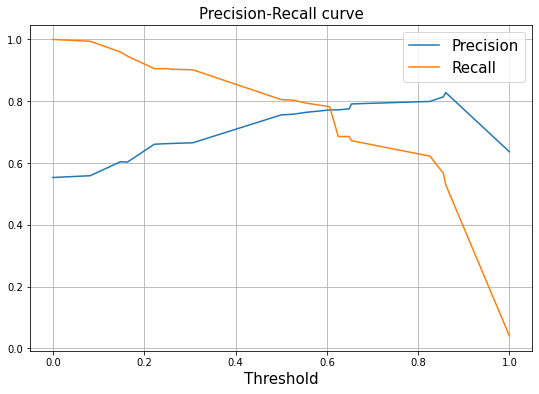

In [ ]:
prec, rec, thresh = precision_recall_curve(target_test, shallow_decision_tree_target_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
None

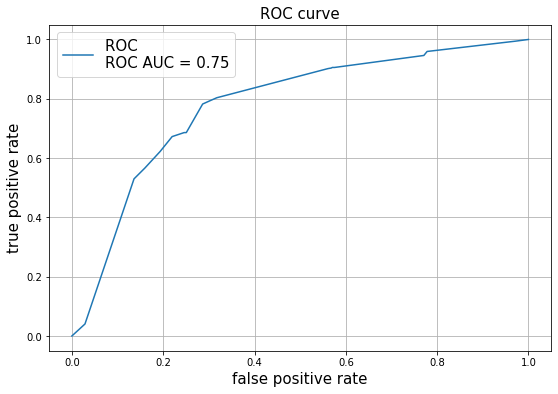

In [ ]:
fpr, tpr, thr = roc_curve(target_test, shallow_decision_tree_target_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc_score(shallow_decision_tree_predictions,target_test),2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
None

### The best deep tree model:

In [ ]:
deep_decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=12345)
deep_decision_tree_model.fit(features_train, target_train)
deep_decision_tree_predictions = deep_decision_tree_model.predict(features_test)
deep_decision_tree_target_out_proba = deep_decision_tree_model.predict_proba(features_test)
print(f"\nRecall for the best deep tree model is {metrics.recall_score(target_test, deep_decision_tree_predictions)}.\n")


Recall for the best deep tree model is 0.7976878612716763.



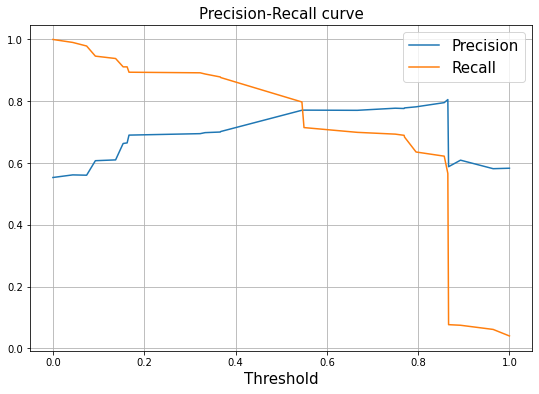

In [ ]:
prec, rec, thresh = precision_recall_curve(target_test, deep_decision_tree_target_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
None

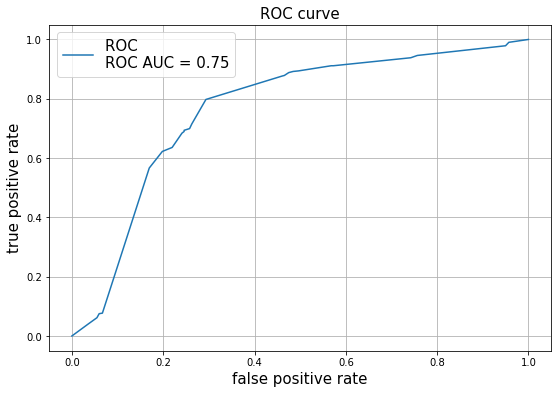

In [ ]:
fpr, tpr, thr = roc_curve(target_test, deep_decision_tree_target_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc_score(deep_decision_tree_predictions,target_test),2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
None

### The best model of random forest on small trees:

In [ ]:
small_random_forest_model = RandomForestClassifier(max_depth=4, n_estimators=17, random_state=12345)
small_random_forest_model.fit(features_train, target_train)
small_random_forest_predictions = small_random_forest_model.predict(features_test)
small_random_forest_target_out_proba = small_random_forest_model.predict_proba(features_test)
print(f"\nRecall for the model of random forest on small trees is {metrics.recall_score(target_test, small_random_forest_predictions)}.\n")


Recall for the model of random forest on small trees is 0.6936416184971098.



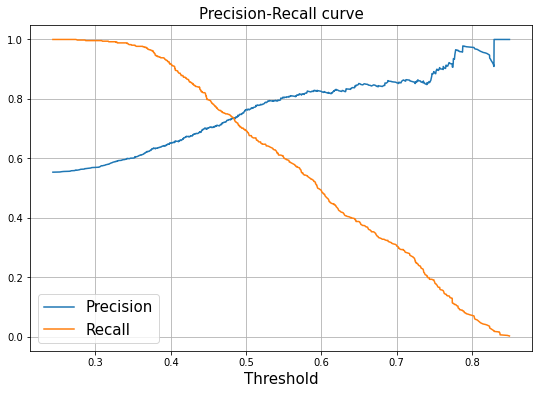

In [ ]:
prec, rec, thresh = precision_recall_curve(target_test, small_random_forest_target_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
None

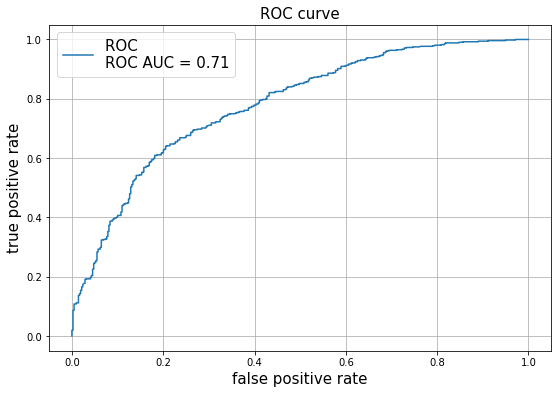

In [ ]:
fpr, tpr, thr = roc_curve(target_test, small_random_forest_target_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc_score(small_random_forest_predictions,target_test),2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
None

### The best model of random forest on deep trees:

In [ ]:
deep_random_forest_model = RandomForestClassifier(max_depth=14, n_estimators=42, random_state=12345)
deep_random_forest_model.fit(features_train, target_train)
deep_random_forest_predictions = deep_random_forest_model.predict(features_test)
deep_random_forest_target_out_proba = deep_random_forest_model.predict_proba(features_test)
print(f"\nRecall for the model of random forest on deep trees is {metrics.recall_score(target_test, deep_random_forest_predictions)}.\n")


Recall for the model of random forest on deep trees is 0.8111753371868978.



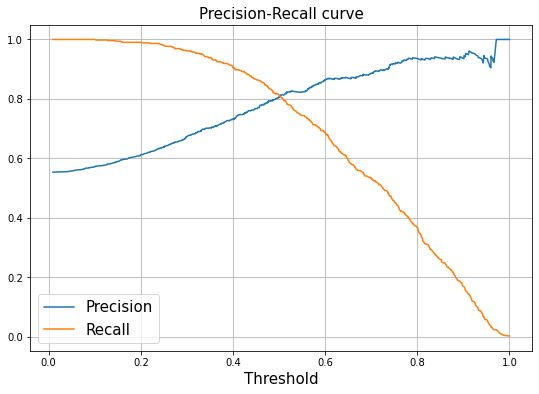

In [ ]:
prec, rec, thresh = precision_recall_curve(target_test, deep_random_forest_target_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
None

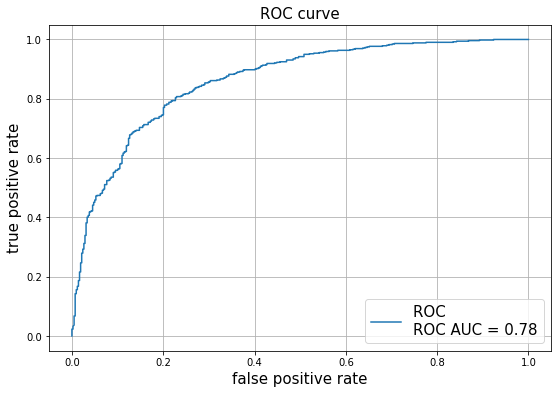

In [ ]:
fpr, tpr, thr = roc_curve(target_test, deep_random_forest_target_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc_score(deep_random_forest_predictions,target_test),2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
None

__To perform the last task (train a classifier that avoids type II errors), we change the value of the class_weight parameter for the best RandomForestClassifier model using deep trees:__

In [ ]:
deep_random_forest_model = RandomForestClassifier(max_depth=14, n_estimators=42, class_weight={0:0.5, 1:5}, random_state=12345)
deep_random_forest_model.fit(features_train, target_train)
deep_random_forest_predictions = deep_random_forest_model.predict(features_test)
deep_random_forest_target_out_proba = deep_random_forest_model.predict_proba(features_test)
print(f"\nRecall for the model of random forest on deep trees is {metrics.recall_score(target_test, deep_random_forest_predictions)}.")
print(f"Accuracy for the model of random forest on deep trees is {metrics.accuracy_score(target_test, deep_random_forest_predictions)}.")
print(f"Precision for the model of random forest on deep trees is {metrics.precision_score(target_test, deep_random_forest_predictions)}.")
print(f"F1-score for the model of random forest on deep trees is {metrics.f1_score(target_test, deep_random_forest_predictions)}.")
print(f"Log-loss for the model of random forest on deep trees is {metrics.log_loss(target_test, deep_random_forest_model.predict_proba(features_test))}.\n")


Recall for the model of random forest on deep trees is 0.9710982658959537.
Accuracy for the model of random forest on deep trees is 0.6663113006396588.
Precision for the model of random forest on deep trees is 0.628428927680798.
F1-score for the model of random forest on deep trees is 0.7630582891748676.
Log-loss for the model of random forest on deep trees is 0.6256949598260656.

